<h1 style="color:Green;">Week 1 Lecture Source Code</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/19UcHoIW3OC2Fd18_VkooiumdG5NtQpu-RoCgfz_I4nM/edit#slide=id.g11b032e97d3_0_0">[Week 1 Lecture Link Here]</a>

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [68]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter
import pandas_datareader as pdr

<h2 style="color:Green;">Preliminary Visualizations (pg. 6)</h2>

Specifying stock ticker, start date, and end date. In our example, the stock is apple (Ticker: AAPL).

In [69]:
SYMBOL = 'AAPL' # Stock Ticker symbol
START_DATE = '2012-05-01' # Stock data start date 
END_DATE = '2022-05-01' # Stock data end date

Extracting adjusted close prices of Apple's stock from Yahoo Finance.

In [70]:
# storing adjusted stock prices into a variable 
stockPx = pdr.get_data_yahoo(SYMBOL, START_DATE, END_DATE)['Adj Close'] 
# converting prices to log returns and removing NaN values
stockLogRet = np.log(stockPx).diff().dropna()

<h3> Stock Price Time Series </h3>

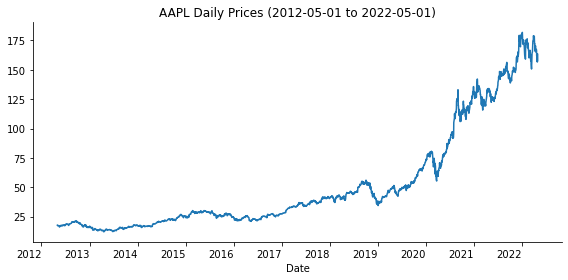

In [68]:
ax = stockPx.plot(figsize=(8, 4),
                      title=SYMBOL+' Daily Prices '+ '(' + START_DATE + ' to ' + END_DATE + ')',
                      rot=0)
sns.despine()
plt.tight_layout();

<h3> Stock Log Return Time Series</h3>

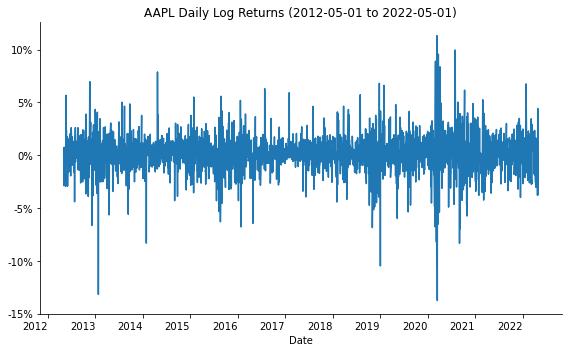

In [69]:
ax = stockLogRet.plot(figsize=(8, 5),
                      title=SYMBOL+' Daily Log Returns '+ '(' + START_DATE + ' to ' + END_DATE + ')',
                      rot=0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
plt.tight_layout();

<h3> Stock Log Return Scatter Plot</h3>

<p style="color:red;">Some values by the time you run this may be different than those in the lecture slides because the code performs visualizations and analyses from the rolling 5 years data (set via the 'TAU' variable), so everyday a new data point is observed and the oldest data point is removed.</p>

Specifying your asset tickers and their data duration

In [58]:
SYMBOL1 = 'ADBE' # Enter the stock 1 symbol here
SYMBOL2 = 'CMG' # Enter the stock 2 symbol here
TAU = 5          # Enter duration of data you want from Yahoo Finance

Visualizing the relationship between SYMBOL1 and SYMBOL2

Text(0.5, 1.0, 'Scatter Plot ADBE vs CMG')

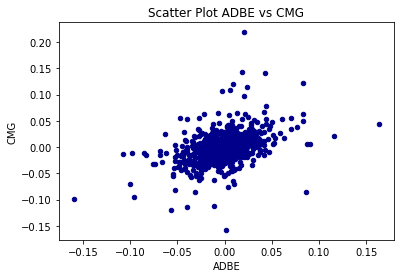

In [26]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
stockPxPair = pdr.DataReader([SYMBOL1, SYMBOL2] , 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
stockLogRetPair = np.log(stockPxPair).diff().dropna()
stockLogRetPair.plot.scatter(x=SYMBOL1, y=SYMBOL2, c='DarkBlue')
plt.title('Scatter Plot ' + SYMBOL1 + ' vs ' + SYMBOL2)

<h3> Stock Log Return Heatmap</h3>

Specifying your asset tickers and their data duration

In [27]:
symbolList = ['AAPL', 'ADBE', 'INTC', 'CMG', 'JPM', 'LMT'] # Enter the list of stock symbols here
# the duration of data was listed above via TAU

Visualizing the relationshipa between the listed stocks

Text(0.5, 1.0, 'Correlations Between Stock Log Return')

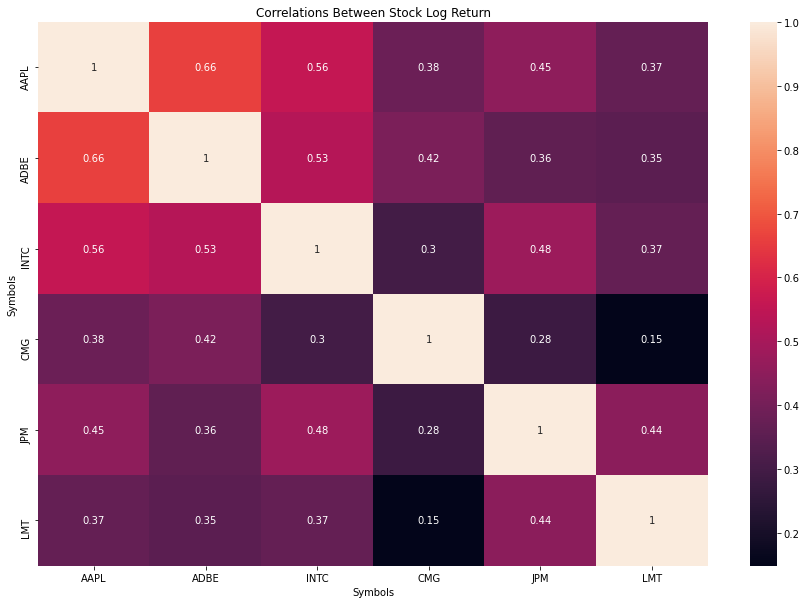

In [28]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
stockPxList = pdr.DataReader(symbolList , 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
stockLogRetList = np.log(stockPxList).diff().dropna()
# visualizing correlation heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(stockLogRetList.corr(),annot=True)
plt.title("Correlations Between Stock Log Return")

<h3> Stock Log Return Box Plot</h3>

Descriptive statistics to describe the box plot

In [71]:
stockLogRet.describe()

count    2516.000000
mean        0.000867
std         0.017884
min        -0.137708
25%        -0.007294
50%         0.000760
75%         0.010218
max         0.113158
Name: Adj Close, dtype: float64

Plotting the box plot

Text(0.5, 0, 'Log Return')

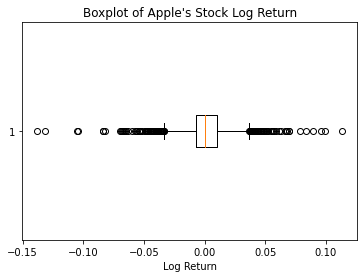

In [72]:
plt.boxplot(stockLogRet, vert=False) # stock log returns are extracted above when visualizing time plots
plt.title("Boxplot of Apple's Stock Log Return")
plt.xlabel("Log Return")

<h3> Stock Log Return Histogram</h3>

Text(0, 0.5, 'Density')

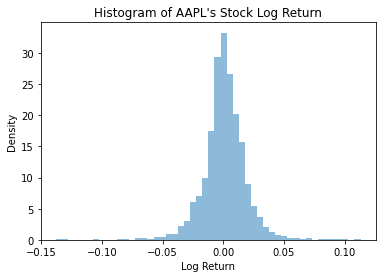

In [73]:
_, bins, _= plt.hist(stockLogRet, bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + SYMBOL + "'s Stock Log Return")
plt.xlabel("Log Return")
plt.ylabel("Density")

<h2 style="color:Green;">Preliminary Normality Testing (pg. 18)</h2>

<h3> Shapiro-Wilk Test</h3>

In [62]:
shapiro_test = stats.shapiro(stockLogRet)
shapiro_test.pvalue

2.2134649726795863e-32

<h3> Jarque-Bera Test (Skewness & Kurtosis) </h3>

What can you say about the skewness and kurtosis of the Normal and Student-t distributions?
(If you haven’t heard about them, you can treat them as some functions for now. We will talk more about them in the Week 2 lecture)

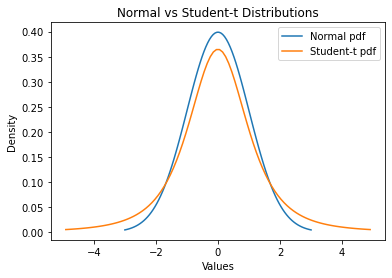

In [63]:
from scipy.stats import norm, t
mu = 0  # defining mean parameter
sigma = 1 # defining standard deviation parameter
# Notice that this is a Standard Normal Distribution
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Normal pdf')
df = 2.74
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), 100)
plt.plot(x, t.pdf(x, df), label='Student-t pdf')
plt.title("Normal vs Student-t Distributions")
plt.xlabel("Values"); plt.ylabel("Density")
plt.legend()

<h3> Jarque-Bera Test (Experiment) </h3>

In [77]:
jarque_bera_test = stats.jarque_bera(stockLogRet)
jarque_bera_test.pvalue

0.0

<h2 style="color:Green;">Preliminary Pre-processing (pg. 27)</h2>

<h3> Economic Recession Data </h3>

We will use a small and simple dataset to demonstrate the data pre-processing stage of our analysis. We use the Federal Reserve’s Economic Data (FRED) service to download the US recession dates as defined by the National Bureau of Economic Research. We also source four variables that are commonly used to predict the onset of a recession (Kelley 2019) and available via FRED, namely:


<ul>
  <li>JHDUSRGDPBR: U.S. recession status</li>
  <li>T10Y3M: The long-term spread of the treasury yield curve, defined as the difference between the ten-year and the three-month Treasury yield</li>
  <li>UMCSENT: The University of Michigan’s consumer sentiment indicator</li>
  <li>NFCI: The National Financial Conditions Index (NFCI)</li>
  <li>NFCINONFINLEVERAGE: The NFCI nonfinancial leverage subindex</li>
  <li>GDPC1: Real GDP (inflation-adjusted)</li>
</ul>

We gather these data dating between 1980 and 2020, a total of 457 months of data.

In [26]:
# specifying  economic indicators
INDICATORS = ['JHDUSRGDPBR', 'T10Y3M', 'NFCI', 'NFCINONFINLEVERAGE', 'UMCSENT', 'GDPC1']
# variable names
VAR_NAMES = ['recession', 'yield_curve', 'financial_conditions', 'leverage', 'sentiment', 'real_gdp']
# predictors for our models
FEATURES = VAR_NAMES[1:]
# what we are predicting - the recession status
LABEL = VAR_NAMES[0]
# variable display
VAR_DISPLAY = ['Recession', 'Yield Curve', 'Financial Conditions', 'Leverage', 'Sentiment', 'Real GDP']
col_dict = dict(zip(VAR_NAMES, VAR_DISPLAY))
# putting them all into one dataframe
econ = (pdr.DataReader(INDICATORS, 'fred', 1980, 2022)
        .ffill()
        .resample('M')
        .last()
        .dropna())
econ.columns = VAR_NAMES

We standardize the features so all indicators have mean 0 standard deviation of 1. We standardize the features mainly because they have different units of measure (e.g.,yield curve is in %, real GDP is in billions of dollars). We scale them so that they can have the same unit. 

In [27]:
econ.loc[:, FEATURES] = scale(econ.loc[:, FEATURES]) # standardizing indicators

Displaying the data structure, data types, and variable columns of the FRED data set.

In [28]:
econ.info() # show data info

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 481 entries, 1982-01-31 to 2022-01-31
Freq: M
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   recession             481 non-null    float64
 1   yield_curve           481 non-null    float64
 2   financial_conditions  481 non-null    float64
 3   leverage              481 non-null    float64
 4   sentiment             481 non-null    float64
 5   real_gdp              481 non-null    float64
dtypes: float64(6)
memory usage: 26.3 KB


Splitting data into 80% training set and 20% testing set.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(econ.loc[:, FEATURES], econ.loc[:, LABEL], test_size=0.2, random_state=0)

<h3>Feature Importance</h3>

Using Random Forest Regressor to find the importance score for each feature.

In [30]:
from sklearn.ensemble import RandomForestRegressor # importing the random forest module

rf_model = RandomForestRegressor(random_state=0) # define the random forest model

rf_model.fit(X_train, y_train) # fit the random forest model

importances = rf_model.feature_importances_ # get importance

indices = np.argsort(importances) # sort the features' index by their importance scores

Ranking features by thier relative importance scores.

Text(0.5, 0, 'Relative Importance')

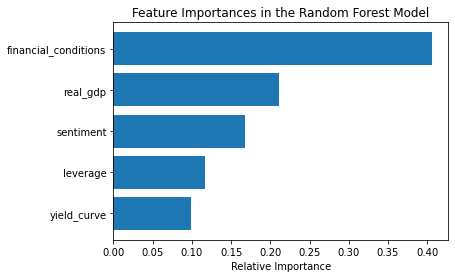

In [31]:
plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')

If you find the data set too complex (e.g., >100 features), you may choose to drop the features that have the lowest importance scores. It is not necessary here to drop any of them, but just to demonstrate, I have added the commented code to drop the appropriate feature for our data, which is the yield_curve. 

In [32]:
# econ= econ.drop(columns=[FEATURES[indices[0]]]) # drop feature in the original data set
# X_train=X_train.drop(columns=[FEATURES[indices[0]]]) # drop feature in the training data set
# X_test=X_test.drop(columns=[FEATURES[indices[0]]]) # drop feature in the testing data set

<h3>Label Imbalance</h3>

We count the number of months which the U.S. economy was and was not in a recession, then plotted them using a barplot.
The class distribution of recession status matches about a 1:7 ratio or 421 examples in the majority class and about 60 examples in the minority class. We need to rebalance this!!

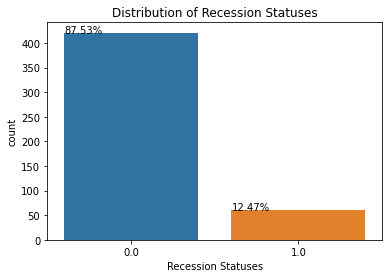

In [71]:
ax = sns.countplot(x = "recession", data = econ)
plt.title('Distribution of Recession Statuses')
plt.xlabel('Recession Statuses')
total = len(econ["recession"])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() 
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

It is not necessary to apply the Synthetic Minority Over-sampling Technique (SMOTE) + Undersampling to rebalance the recession classes here as we are exploring our data as opposed to fitting a model to it. Despite this, I have comment-coded that demonstrates how SMOTE is implemented. More reference here: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
<br><br>
Originally, SMOTE selects a minority class instance and finds its k (default: k=5) nearest minority class neighbors to upsample the minority class. Here, we make a little tweak to SMOTE to combine it with undersampling of the majority class. Specifically, we can update the recession data to first oversample the minority class to have 15 % the number of examples of the majority class, then use random undersampling to reduce the number of examples in the majority class to have 50 % more than the minority class.

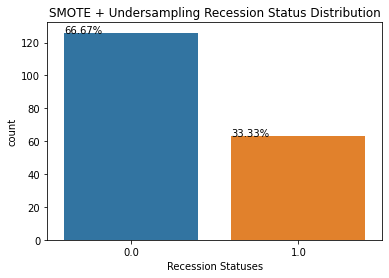

In [89]:
# from collections import Counter
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
# from numpy import where

# over = SMOTE(sampling_strategy=0.15)
# under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# # transform the dataset
# X_SMOTE, y_SMOTE = pipeline.fit_resample(econ.loc[:, FEATURES], econ.loc[:, LABEL])

# # plotting label distribution after SMOTE
# ax = sns.countplot(x='recession', data = pd.DataFrame(y_SMOTE))
# plt.title('SMOTE + Undersampling Recession Status Distribution')
# plt.xlabel('Recession Statuses')
# total = len(y_SMOTE)
# for p in ax.patches:
#         percentage = '{:.2f}%'.format(100 * p.get_height()/total)
#         x_coord = p.get_x() 
#         y_coord = p.get_y() + p.get_height()+0.02
#         ax.annotate(percentage, (x_coord, y_coord))

The dataset is transformed, first by oversampling the minority class, then undersampling the majority class. The final class distribution after this sequence of transforms matches a 1:2 ratio or about 126 examples in the majority class and about 63 examples in the minority class. We have improved the minority-to-majority class ratio from 1:7 to 1:2, which seems to be a reasonable amount of bias for our analysis later. <br><br>
Also notice the sample size changes.

<h3>Feature Value Distribution (by recession status)</h3>

While we're at it, we can also display box plots to show the feature distribution by recession status.

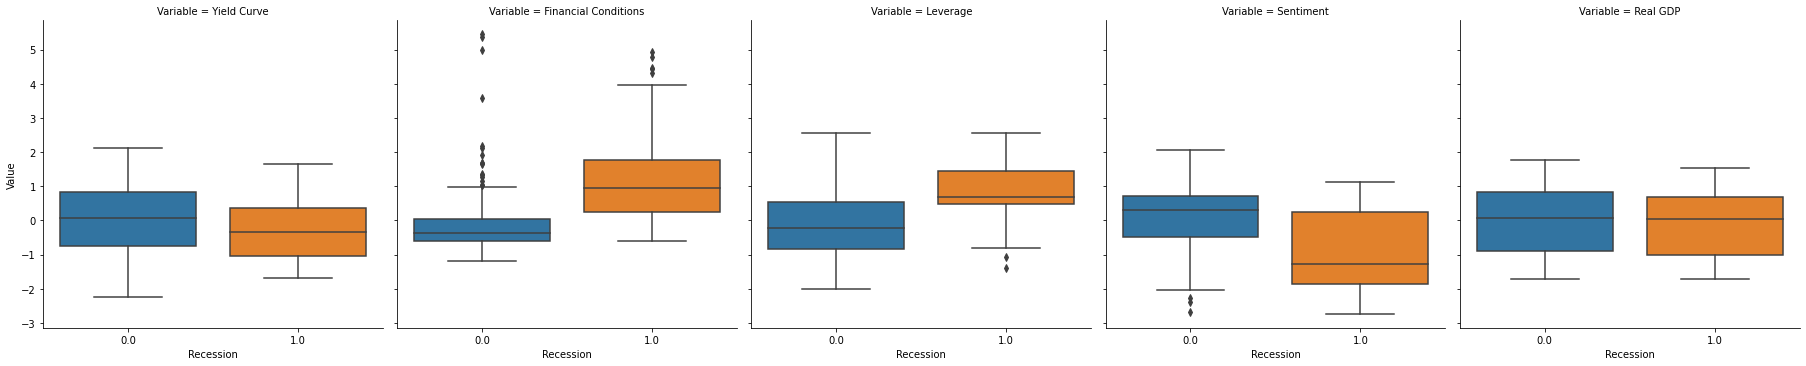

In [34]:
# reshape the full data set into variable-value pairs
econ_ = pd.melt(econ.rename(columns=col_dict), id_vars='Recession').rename(columns=str.capitalize)
# display box plots to show the feature distribution by recession status
g = sns.catplot(x='Recession', y='Value', col='Variable', data=econ_, kind='box')

<h3>Multicollinearity</h3>

How can detect if an independent variable (feature) in a regression model is linearly correlated with another independent variable? <br><br>
You are right , we can do this through a correlation heatmap!!!
<br><br>
Through the correlation heatmap, we see a moderate correlation between the variables. Since none of the correlations are > 0.5, we do not have to worry about multicollinearity problem for these features. Hence, we don't have to drop any feature columns because of correlation.

Text(0.5, 1.0, 'Correlations Between Recession Features')

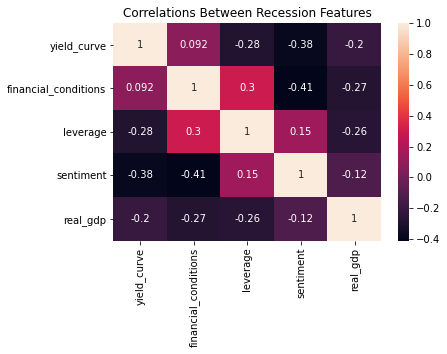

In [97]:
# plotting a correaltion heatmap to identify correlations b/w features
sns.heatmap(econ.loc[:, FEATURES].corr(), annot=True)
plt.title("Correlations Between Recession Features")

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model. In the case when there are too many features (e.g., >50) and the correlation heatmap looks complicated, VIF values can be used to identify highly correlated variables.<br><br>
A VIF of 1 indicates the features are not correlated, a VIF between 1 and 5 indicates moderate correlation, and a VIF above 5 indicates high correlation.<br><br>
We observe moderate correlations between the variables and conclude no particular features to be dropped for our analysis.

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'Features': FEATURES, 'VIF': [variance_inflation_factor(econ.loc[:, FEATURES].values, i) for i in range(len(FEATURES))]})

,Features,VIF
0,yield_curve,1.425632
1,financial_conditions,1.569597
2,leverage,1.349180
3,sentiment,1.641985
4,real_gdp,1.348828
